## For issue
```
Failed to get convolution algorithm. This is probably because cuDNN failed to initialize,
```

In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#Mobile Net v2
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(input_shape=(224, 224, 3))
model.summary()

Using TensorFlow backend.
/home/kung/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kung/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kung/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kung/anaconda3

Instructions for updating:
Colocations handled automatically by placer.


2022-02-15 23:32:12.457657: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-02-15 23:32:12.482142: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 4000079999 Hz
2022-02-15 23:32:12.482545: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5582656ed640 executing computations on platform Host. Devices:
2022-02-15 23:32:12.482569: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022-02-15 23:32:12.602681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 23:32:12.603143: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 major: 7 minor: 5 memoryClockRate(GHz)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [3]:
from keras.models import Model

model2 = Model(inputs=model.input, outputs=model.get_layer("global_average_pooling2d_1").output)

In [4]:
from keras.layers import Dense, Activation

model3_fc2 = Dense(15, activation=None)(model2.output)
#model3_output = Activation('softmax')(model3_fc2)

model57 = Model(inputs=model2.input, outputs=model3_fc2)
model57.summary()

model57.save('model01.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [3]:
import numpy as np
def rgb888_to_rgb565(img_rgb):
    R5 = (img_rgb[...,0]>>3).astype(np.uint16) << 11
    G6 = (img_rgb[...,1]>>2).astype(np.uint16) << 5
    B5 = (img_rgb[...,2]>>3).astype(np.uint16)
    RGB565 = R5 | G6 | B5
    return RGB565

def reg565_to_rgb888(img_rgb565):
    im_h = img_rgb565.shape[0]
    im_w = img_rgb565.shape[1]
    RGB888 = np.zeros((im_h, im_w, 3), dtype=np.uint8)
    for i in range(im_h):
        for j in range(im_w):
            bin_string = '{0:016b}'.format(img_rgb565[i][j])
            # print(bin_string)

   
            r5 = bin_string[:5]
            g6 = bin_string[5:5+6]
            b5 = bin_string[11:]
#             print(f"r5 = {r5}")
#             print(f"g6 = {g6}")
#             print(f"b5 = {b5}")
            
#             print(int(r5, 2))
#             print(int(g6, 2))
#             print(int(b5, 2))
            RGB888[i, j, 0] = int(r5, 2)*8
            RGB888[i, j, 1] = int(g6, 2)*4
            RGB888[i, j, 2] = int(b5, 2)*8
            
    return RGB888

            
            


img_rgb = np.random.randint(0,256, (3,2,3), dtype=np.uint8)
print("original rgb image")
print(img_rgb)
img_rgb565 = rgb888_to_rgb565(img_rgb)
print("rgb 565 integer")
print(img_rgb565)

img_rgb888 = reg565_to_rgb888(img_rgb565)
print("recover rgb 565 to rgb 888")
print(img_rgb888)

original rgb image
[[[ 87 178 238]
  [172 202   4]]

 [[  7 140 227]
  [189 165 139]]

 [[201 178  10]
  [246  73  46]]]
rgb 565 integer
[[21917 44608]
 [ 1148 48433]
 [52609 62021]]
recover rgb 565 to rgb 888
[[[ 80 176 232]
  [168 200   0]]

 [[  0 140 224]
  [184 164 136]]

 [[200 176   8]
  [240  72  40]]]


/home/kung/anaconda3/envs/test_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


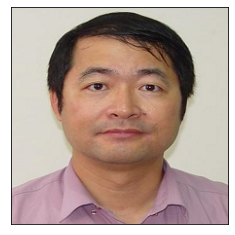

2022-02-15 23:32:37.111612: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


[[ 0.34770453  0.03590089  0.9335872  -1.5453464  -0.34478062 -0.8584415
  -1.1466492  -1.1405845  -0.21614958 -0.49921486 -0.29235125  1.0638703
  -0.05025202 -0.71905124  0.9767448 ]]


In [4]:
# test predict output
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt


model = load_model('model01.h5')

im = cv2.cvtColor(cv2.imread('../images/birdman.bmp'), cv2.COLOR_BGR2RGB)
rgb565 = rgb888_to_rgb565(im)
im2 = reg565_to_rgb888(rgb565) #變成rgb 565 的影像


# 因為在batch_compile的過程中我們設定"img_preprocess_method"="kneron"，所以影像需要做以下處理
im3 = im2.astype(np.float)
im3 = im3 / 256.0
im3 = im3 - 0.5

plt.imshow(im)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img_batch = np.expand_dims(im3, axis=0)
print(model.predict(img_batch))

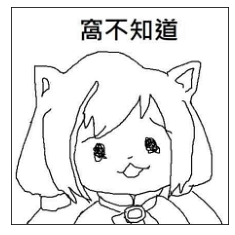

[[ 0.27973098  1.1538566   0.8250836  -0.71201515  0.24510324  0.4809844
  -0.14813066  0.38761038 -1.4092656  -2.1542213  -0.00809571 -0.3934995
  -0.54889816  0.7901486   0.26942948]]


In [5]:
im = cv2.cvtColor(cv2.imread('../images/img09.bmp'), cv2.COLOR_BGR2RGB)
rgb565 = rgb888_to_rgb565(im)
im2 = reg565_to_rgb888(rgb565) #變成rgb 565 的影像


# 因為在batch_compile的過程中我們設定"img_preprocess_method"="kneron"，所以影像需要做以下處理
im3 = im2.astype(np.float)
im3 = im3 / 256.0
im3 = im3 - 0.5

plt.imshow(im)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img_batch = np.expand_dims(im3, axis=0)
print(model.predict(img_batch))